In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv('ex2data1.txt', header = None, sep = ',', names = ['exam1', 'exam2', 'result'])

In [3]:
df.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
positive = df[df['result'].isin([1])]
negative = df[df['result'].isin([0])]

m = df.shape[0]

Text(0, 0.5, 'exam2')

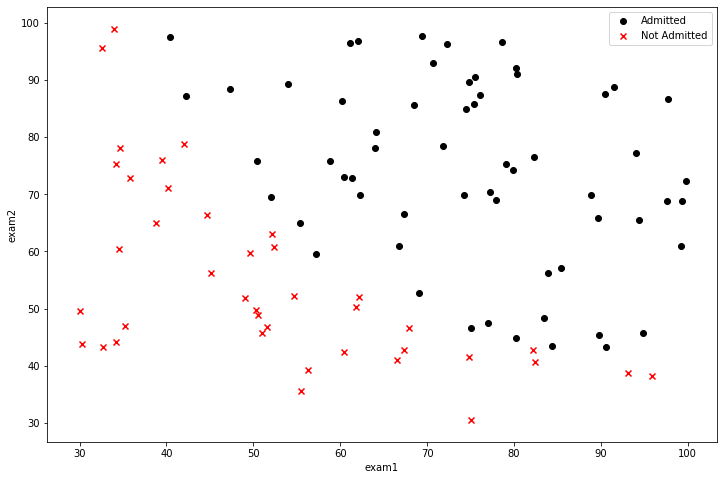

In [5]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['exam1'], positive['exam2'], marker = 'o', color = 'black', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], marker = 'x', color = 'red', label='Not Admitted')
ax.legend()
ax.set_xlabel('exam1')
ax.set_ylabel('exam2')

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
df.shape

(100, 3)

In [8]:
one = np.ones((df.shape[0],1))

In [9]:
X = df.iloc[:, 0:2]
y = df.iloc[:, 2]

In [10]:
X.shape

(100, 2)

In [11]:
theta = np.zeros(3)

In [12]:
y.shape

(100,)

In [13]:
def costFunction(theta, X, y):
    X = np.hstack((one, df.iloc[:, 0:2]))
    y = y[:, np.newaxis]
    theta = theta.reshape((3,1))
    hypothesis = sigmoid(np.dot(X, theta))
    cost = (- 1 / m) * np.sum((y * np.log(hypothesis)) + ((one - y) * np.log(one - hypothesis)))
    gradient = (1 / m) * np.dot(X.transpose(), (hypothesis - y))
    return cost, gradient

In [14]:
print(costFunction(theta, X, y)[0])

0.6931471805599453


In [15]:
grad = costFunction(theta, X, y)[1]

In [16]:
grad

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [17]:
test_theta = np.array([-24, 0.2, 0.2])

In [18]:
cost, grad = costFunction(test_theta, X, y)

In [19]:
cost

0.21833019382659785

In [20]:
grad

array([[0.04290299],
       [2.56623412],
       [2.64679737]])

In [21]:
result = opt.minimize(costFunction, theta, (X, y), jac = True, method = 'TNC', options = {'maxiter' : 400})

In [22]:
type(result)

scipy.optimize.optimize.OptimizeResult

In [23]:
final_theta = result.x # The solution of the optimization.

In [24]:
final_theta

array([-25.16131854,   0.20623159,   0.20147149])

In [25]:
cost = result.fun # Value of objective function.

In [26]:
print(cost)

0.20349770158947494


In [27]:
prob = sigmoid(np.dot([1, 45, 85], final_theta))

In [28]:
prob

0.776290622052972

In [29]:
def predict(theta, X):
    X = np.hstack((one, df.iloc[:, 0:2]))
    theta = theta.reshape((3,1))
    hypothesis = sigmoid(np.dot(X, theta))
    p = np.round(hypothesis)
    return p

In [30]:
res = predict(final_theta, X)

In [35]:
y = y[:, np.newaxis]

In [39]:
accuracy = np.mean(res == y)

In [40]:
print(accuracy * 100)

89.0
